In [1]:
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt

In [28]:
import glob
import os


def find_mseed_files(directory):
    mseed_files = glob.glob(os.path.join(directory, '**', '*.mseed'), recursive=True)
    return mseed_files

In [29]:
directory = r'E:\learning\space\data\lunar\test\data' 
mseed_files = find_mseed_files(directory)

In [30]:
mseed_files

['E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1969-12-16HR00_evid00006.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-01-09HR00_evid00007.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-02-07HR00_evid00014.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-02-18HR00_evid00016.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-03-14HR00_evid00018.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-03-30HR00_evid00020.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-04-03HR00_evid00021.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-05-20HR00_evid00026.mseed',
 'E:\\learning\\space\\data\\lunar\\test\\data\\S12_GradeB\\xa.s12.00.mhz.1970-05-23HR00_evid00027.mseed',
 'E:\\learning\\space\\data\\lunar\\t

In [33]:
len(mseed_files)

96

In [34]:
cat = pd.read_csv("E:\learning\space\catalog_lunar_predictions.csv")
cat

filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0    xa.s12.00.mhz.1969-12-16HR00_evid00006     1969-12-16T04:49:13.234604   
1    xa.s12.00.mhz.1969-12-16HR00_evid00006     1969-12-16T05:54:53.611962   
2    xa.s12.00.mhz.1969-12-16HR00_evid00006     1969-12-16T10:04:51.045925   
3    xa.s12.00.mhz.1969-12-16HR00_evid00006     1969-12-16T20:59:23.649698   
4    xa.s12.00.mhz.1969-12-16HR00_evid00006     1969-12-16T23:01:34.668566   
..                                      ...                            ...   
360  xa.s16.00.mhz.1973-08-25HR00_evid00443     1973-08-25T12:32:13.426189   
361  xa.s16.00.mhz.1973-08-25HR00_evid00443     1973-08-25T13:36:46.029962   
362  xa.s16.00.mhz.1973-08-25HR00_evid00443     1973-08-25T20:19:35.841283   
363  xa.s16.00.mhz.1973-12-18HR00_evid00487     1973-12-18T14:47:59.623226   
364  xa.s16.00.mhz.1974-11-14HR00_evid00587     1974-11-14T20:49:39.472755   

     time_rel(sec)  
0     17353.056604  
1     21293.433962  
2     36290.867925  
3     75563.471698  
4     82894.490566  
..             ...  
360   45132.830189  
361   49005.433962  
362   73175.245283  
363   53279.396226  
364   74979.320755  

[365 rows x 3 columns]

C:\Users\AHSYV4O\AppData\Local\Temp\ipykernel_20844\2520122561.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')
C:\Users\AHSYV4O\AppData\Local\Temp\ipykernel_20844\2520122561.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,1,figsize=(10,3))


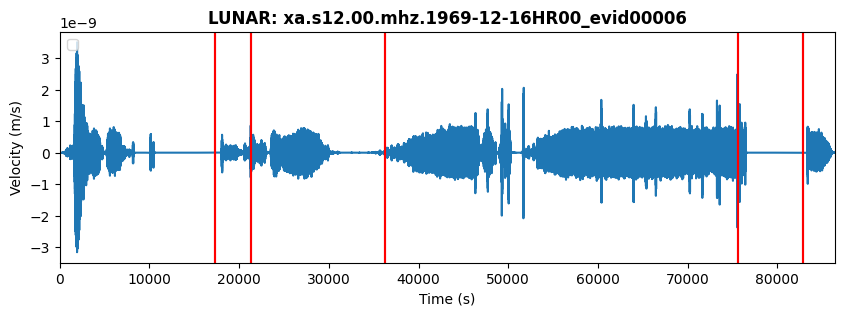

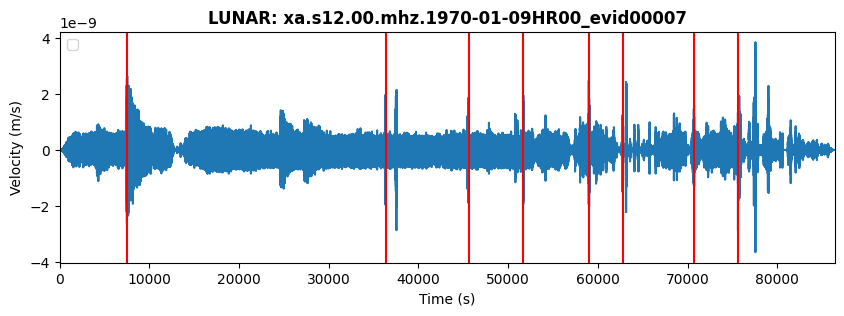

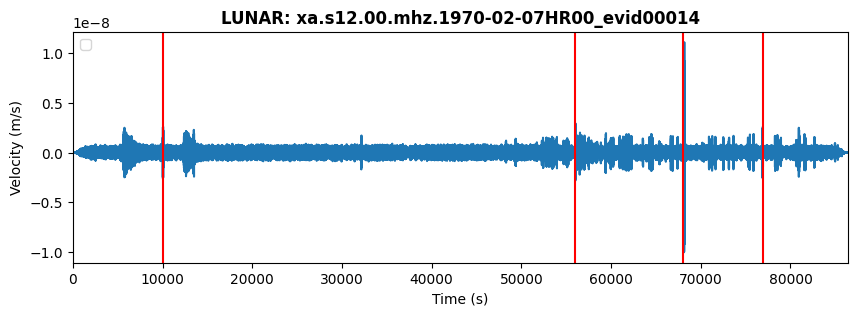

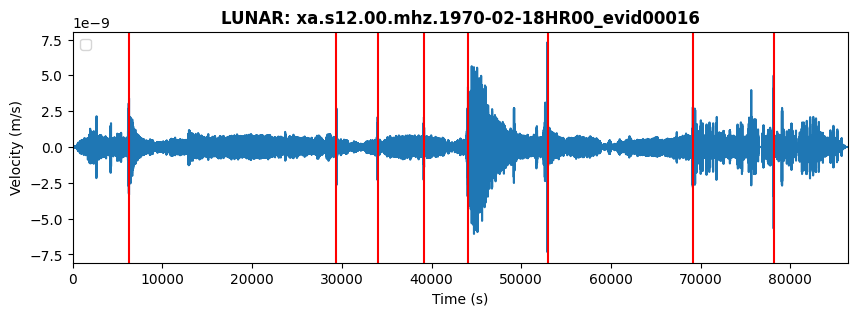

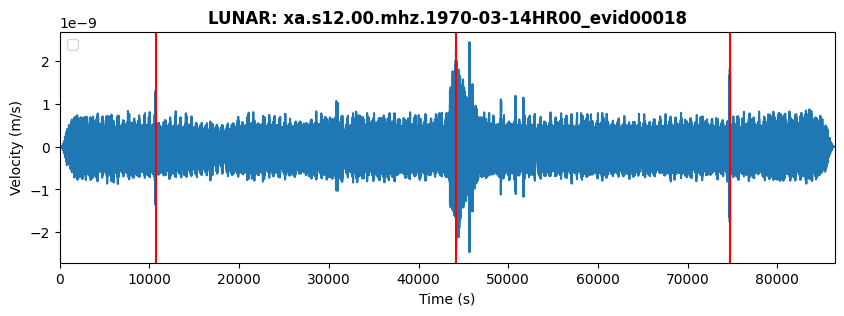

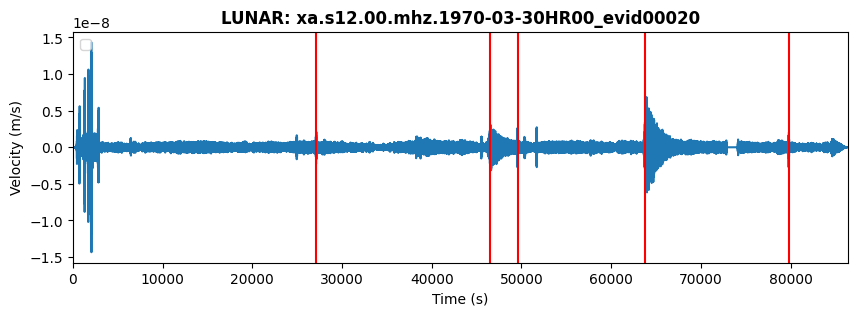

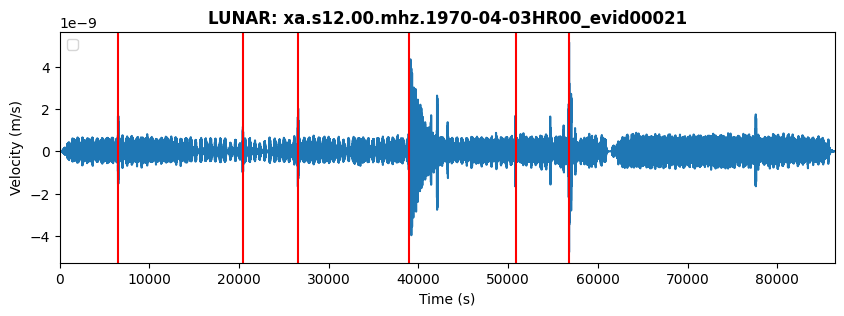

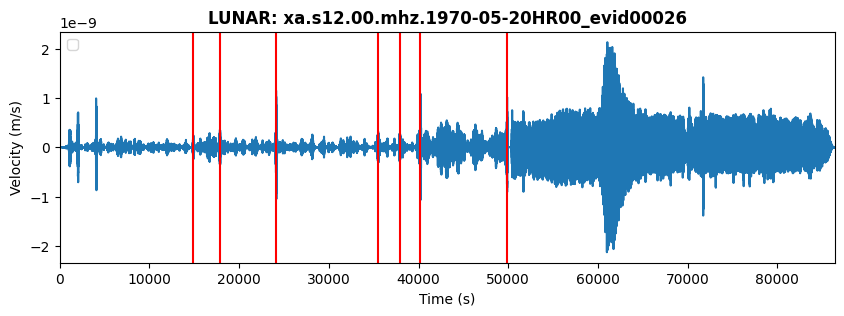

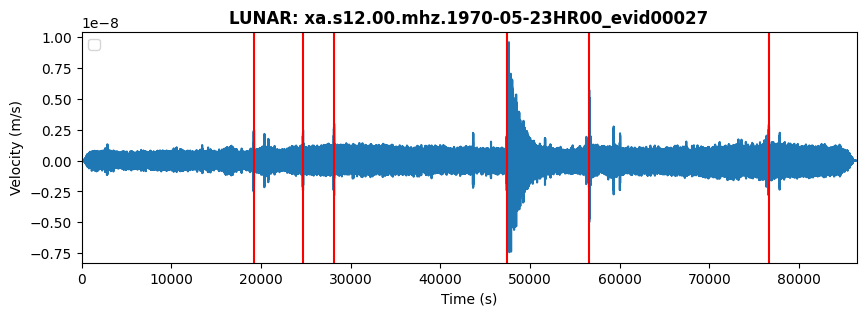

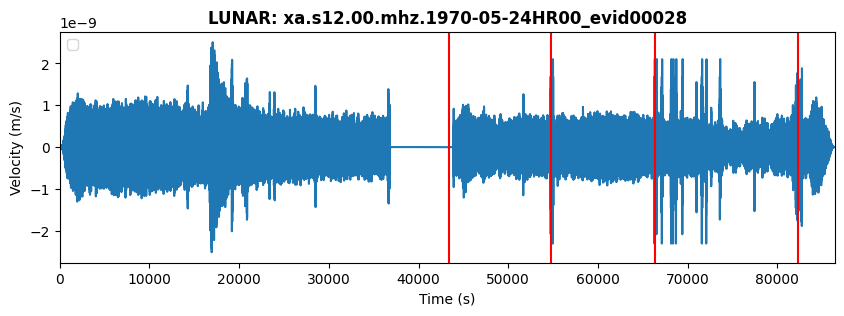

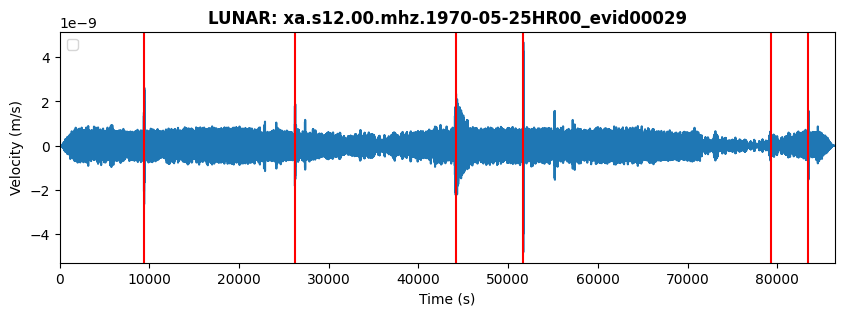

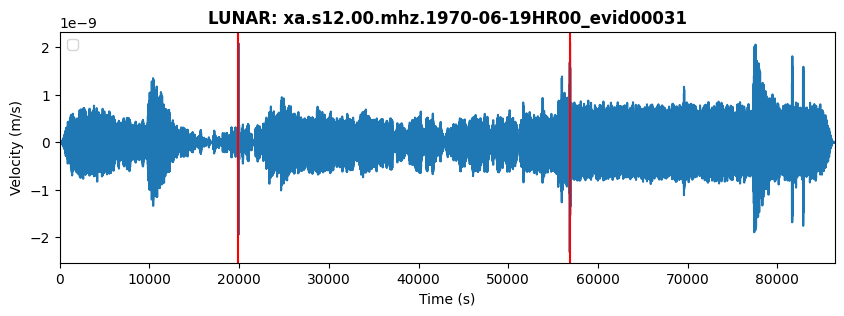

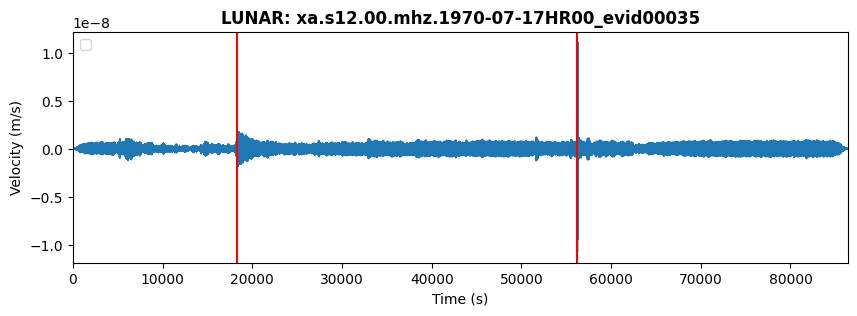

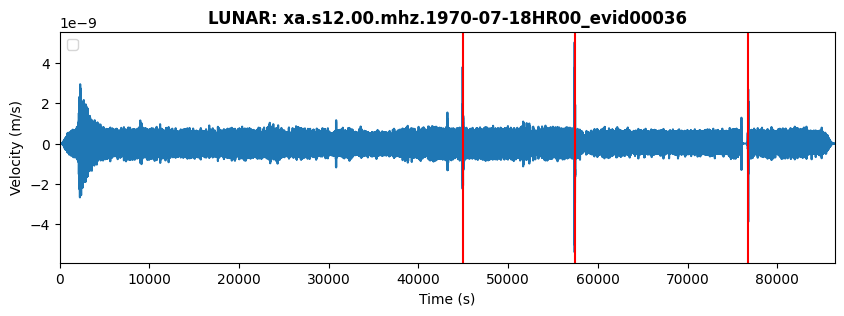

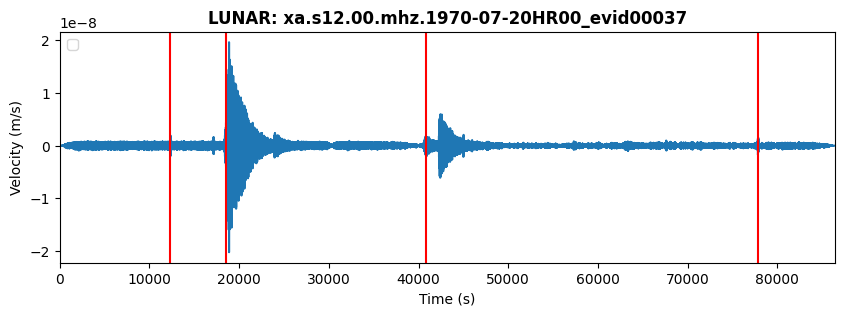

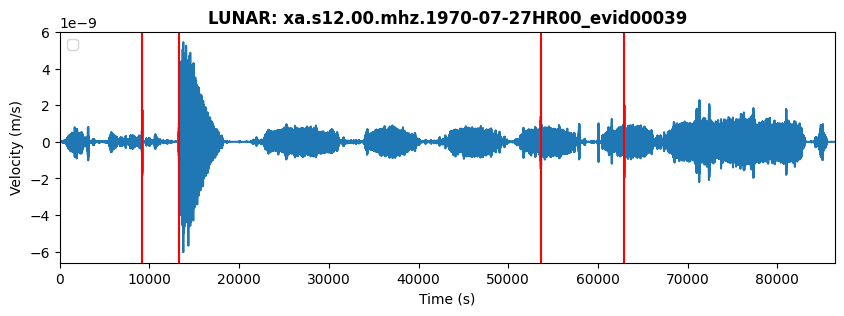

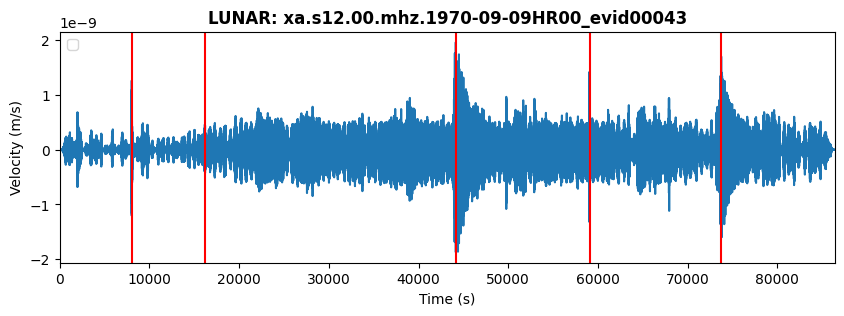

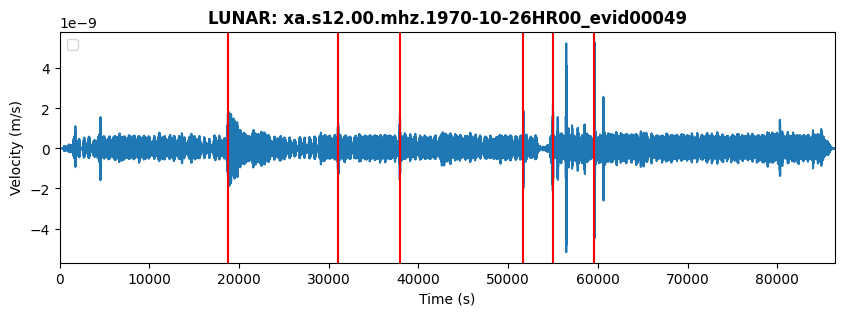

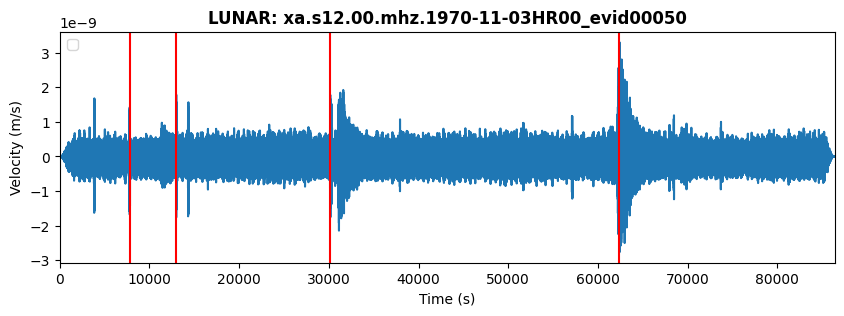

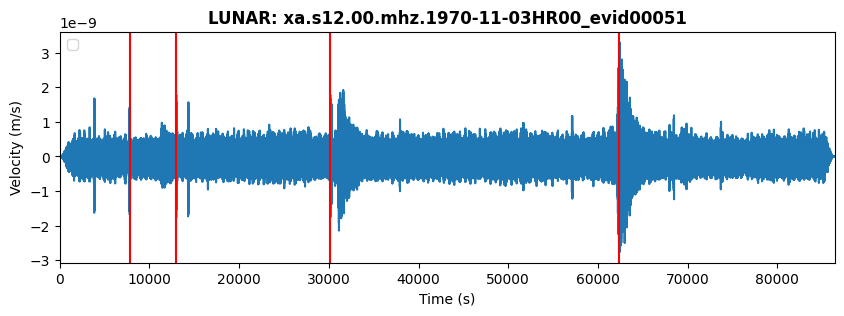

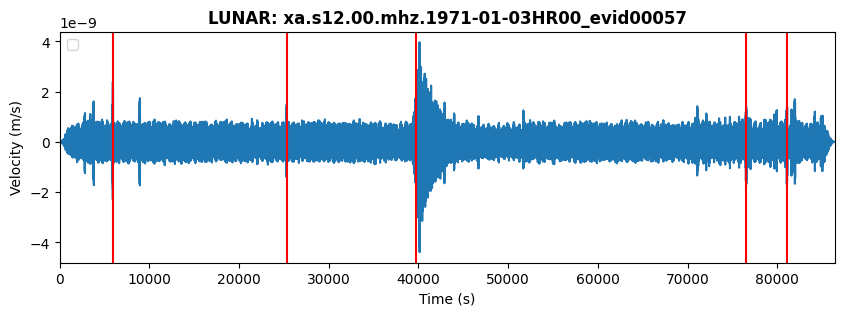

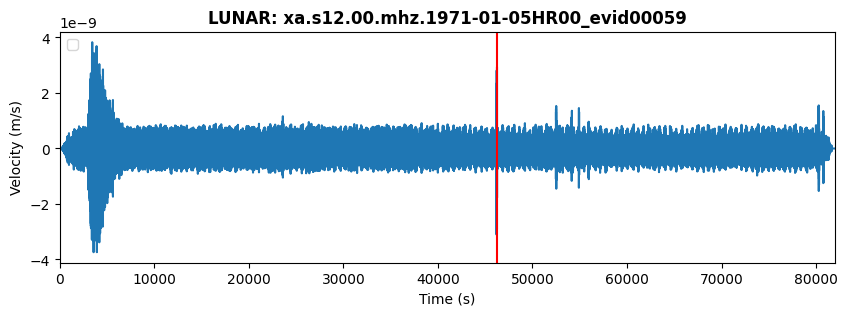

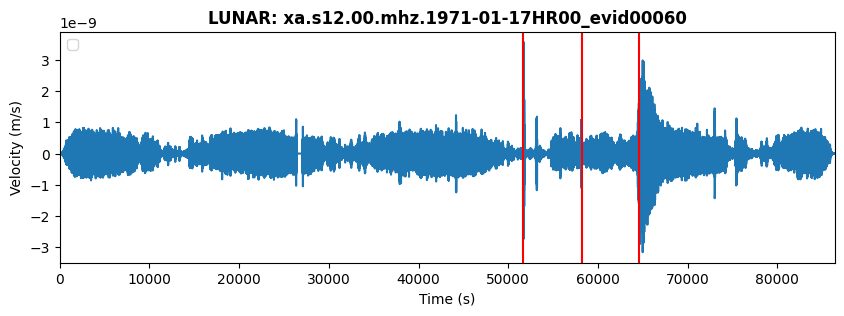

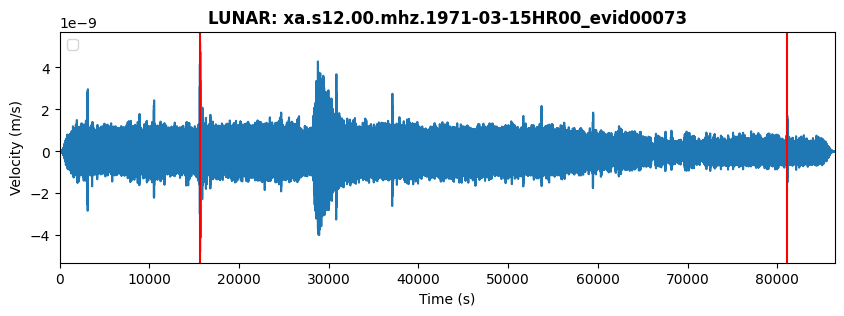

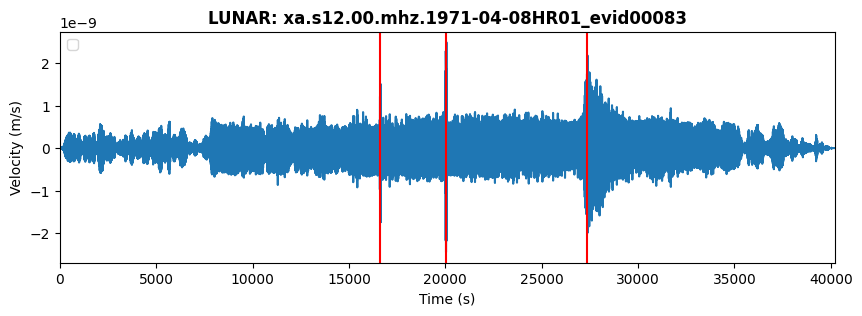

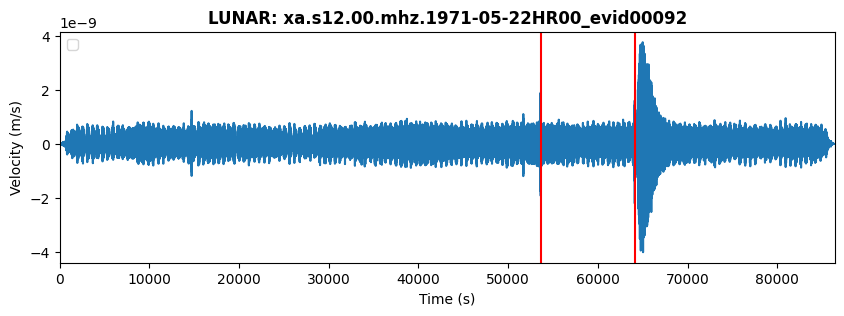

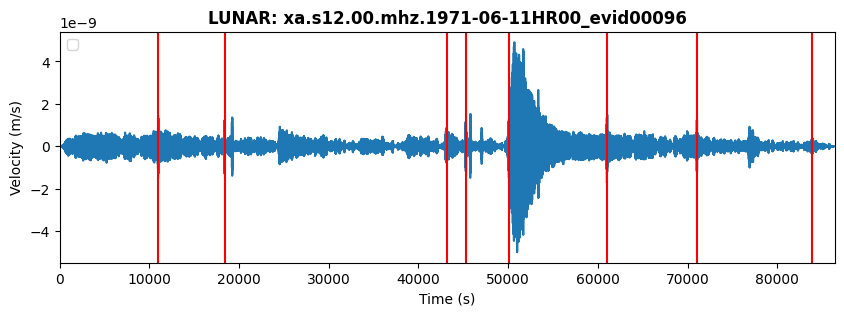

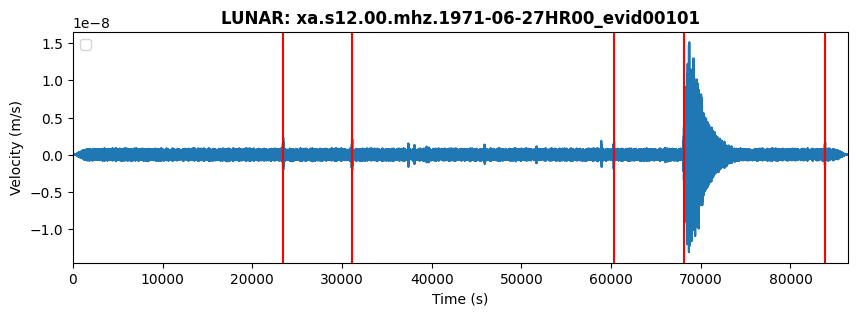

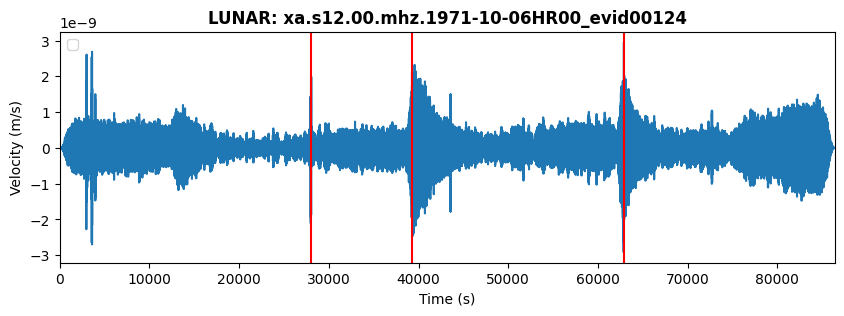

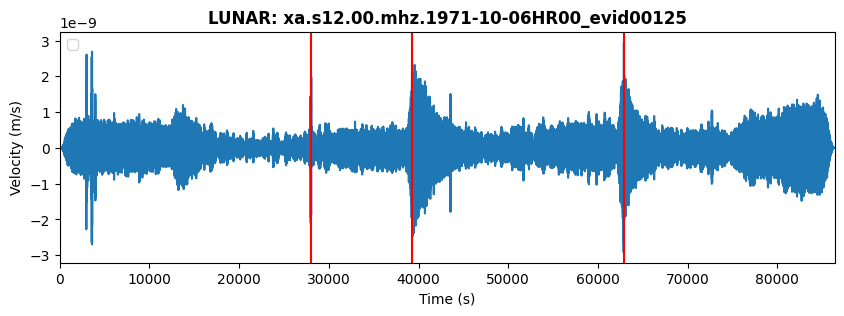

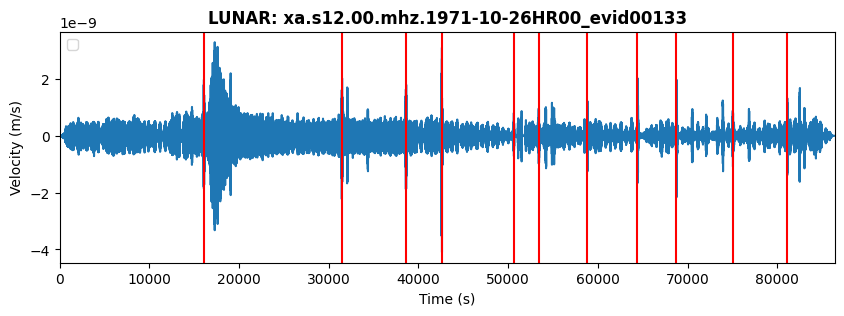

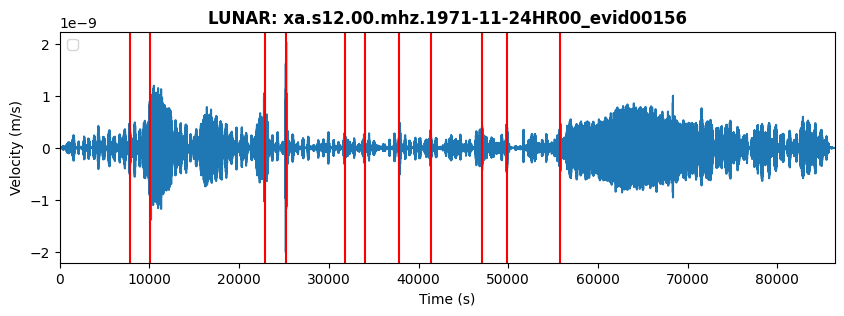

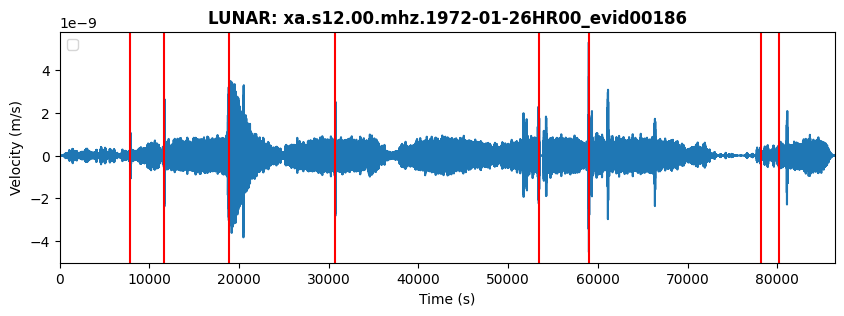

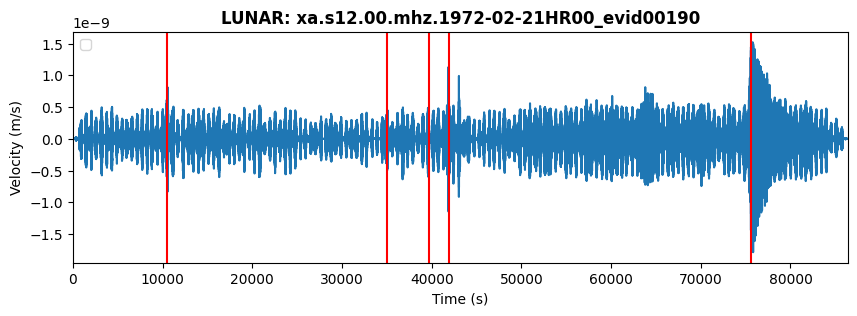

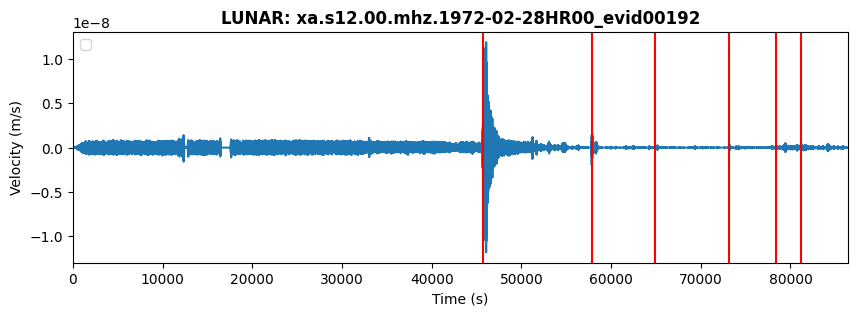

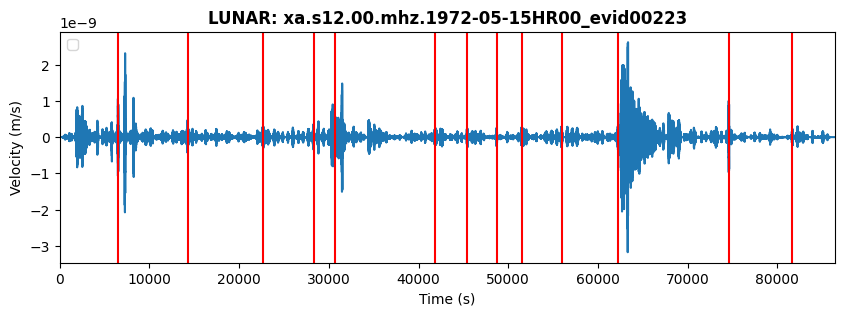

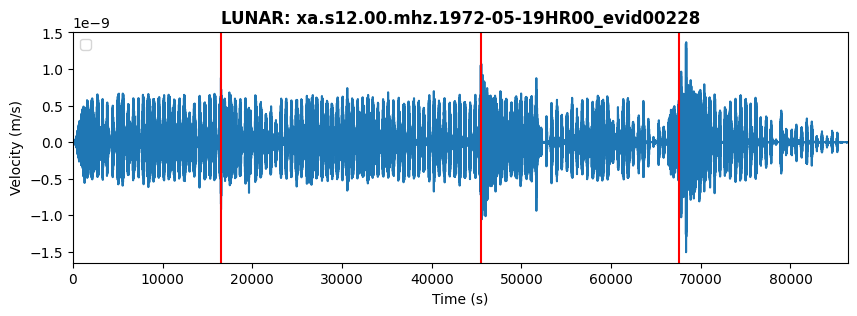

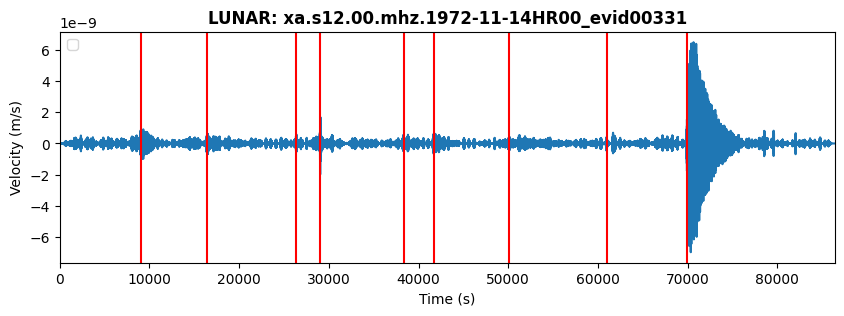

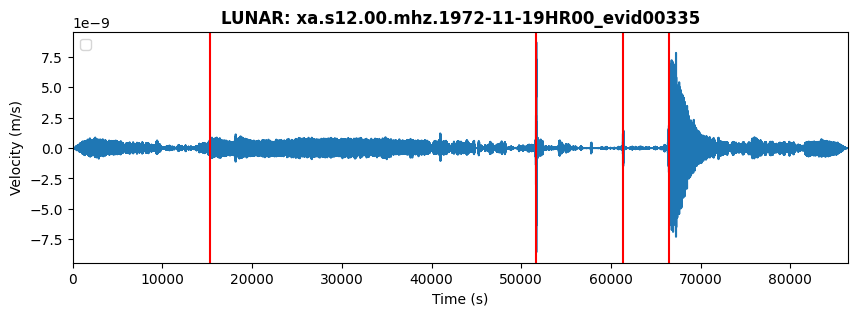

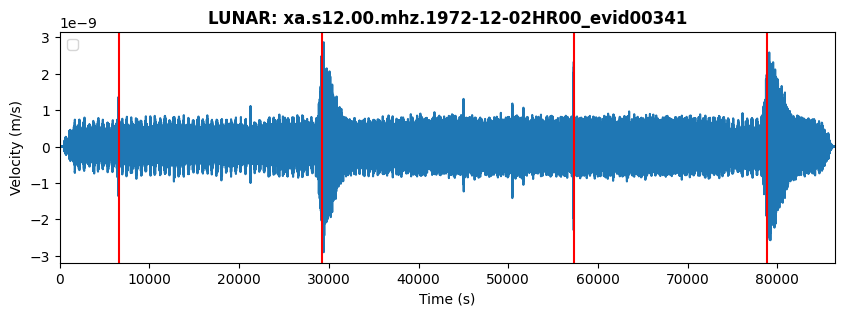

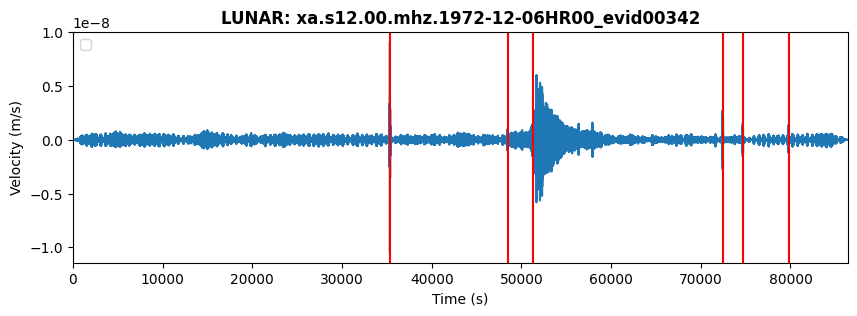

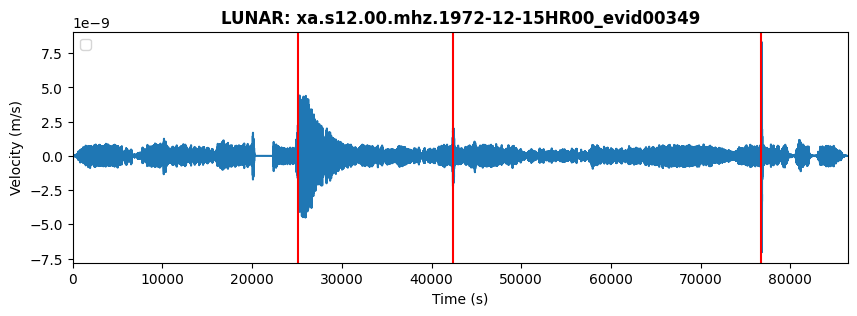

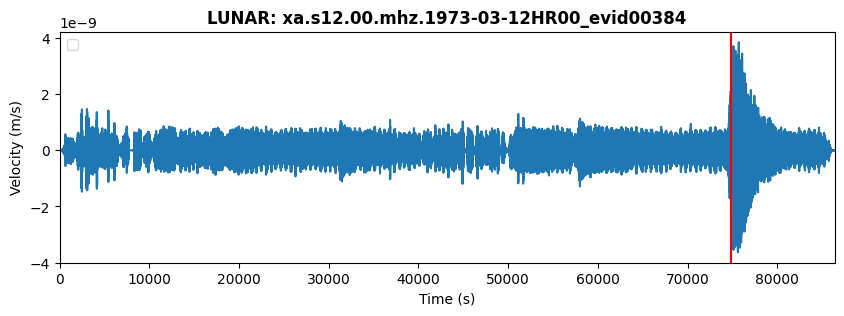

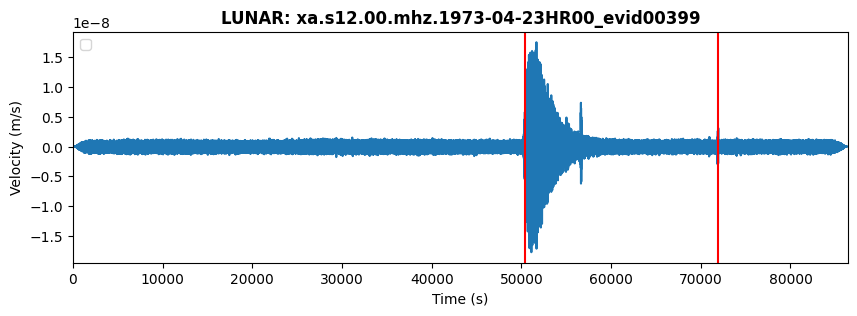

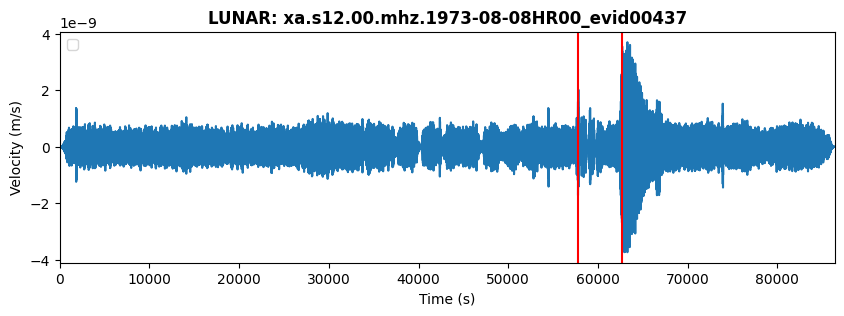

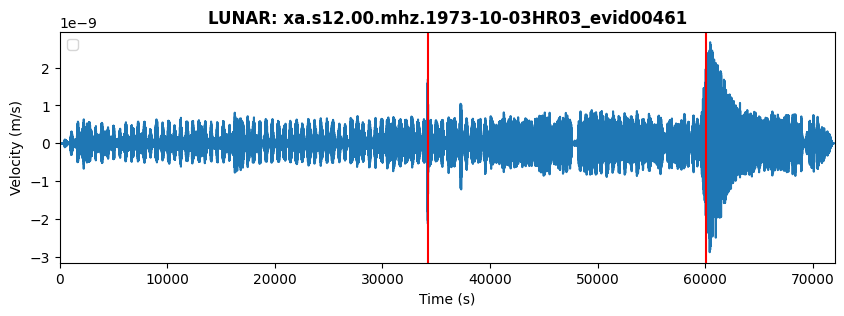

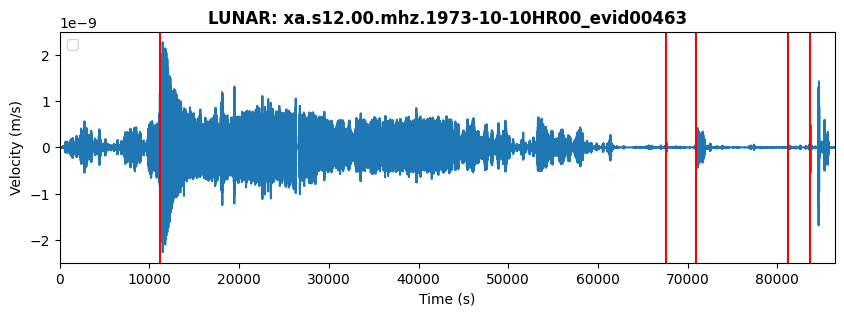

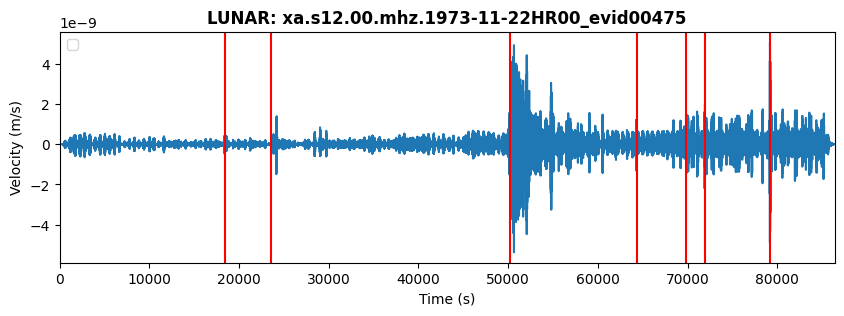

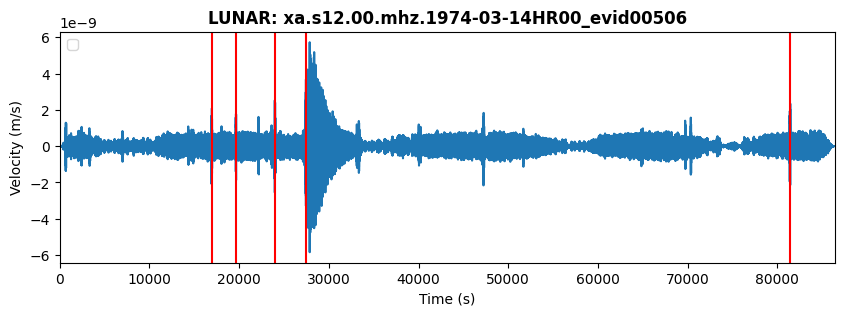

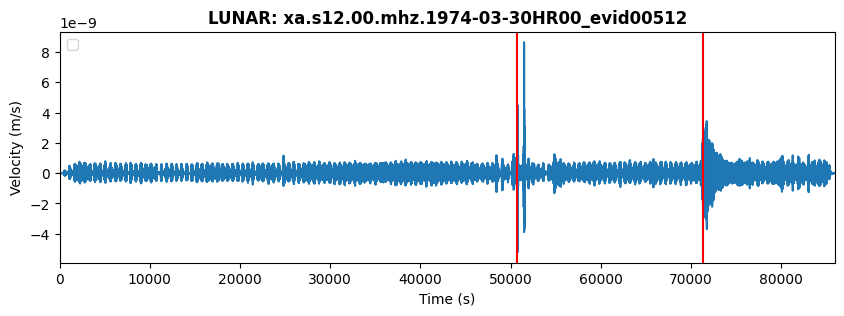

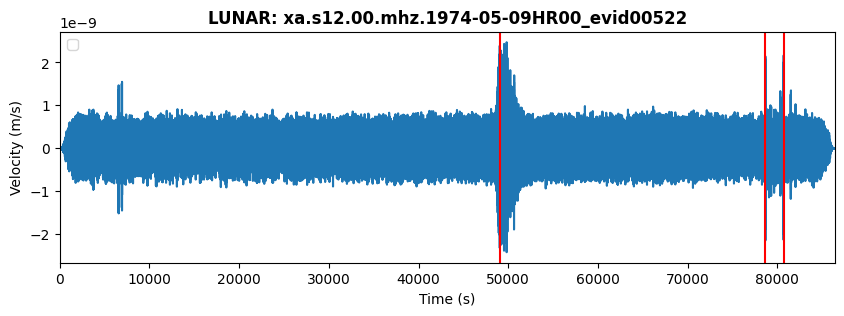

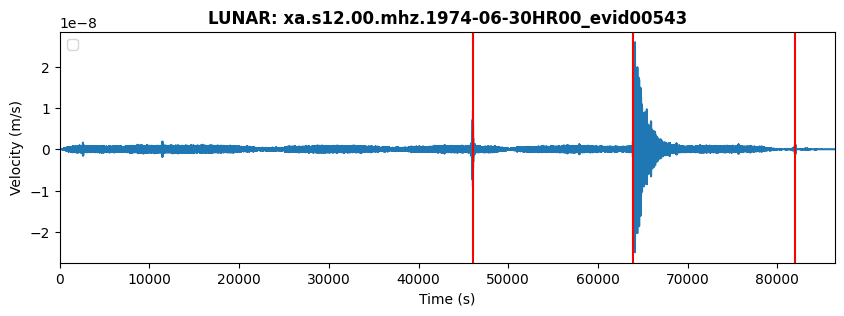

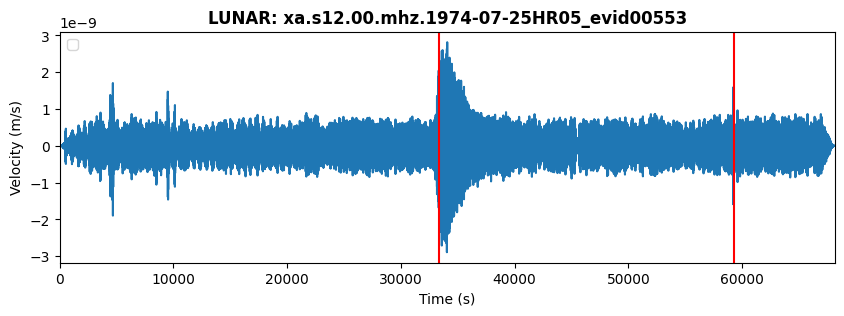

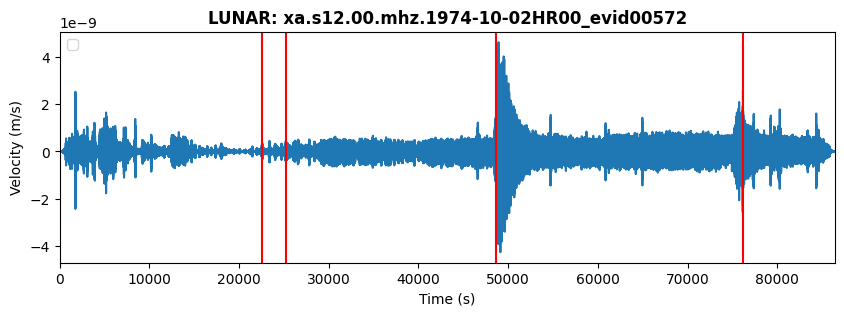

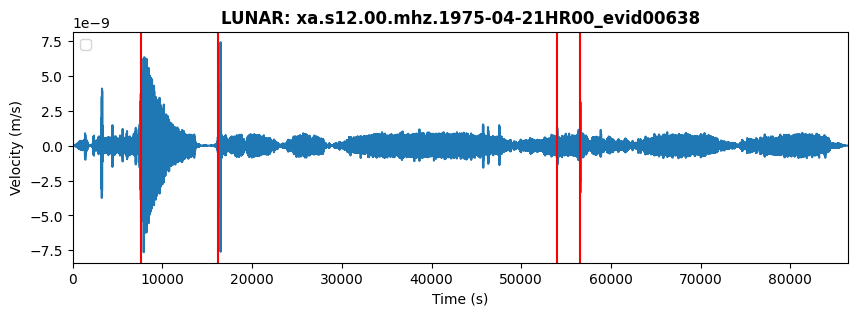

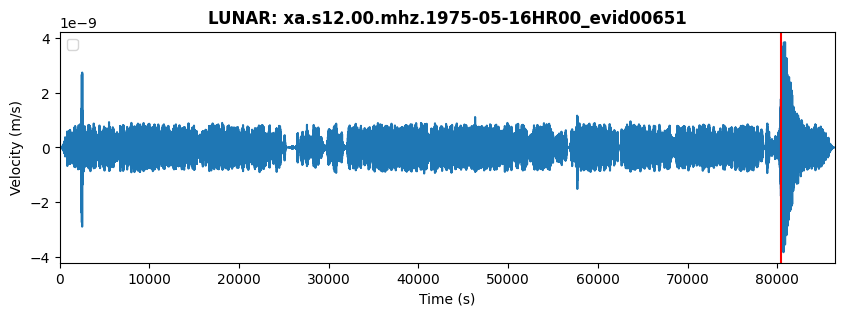

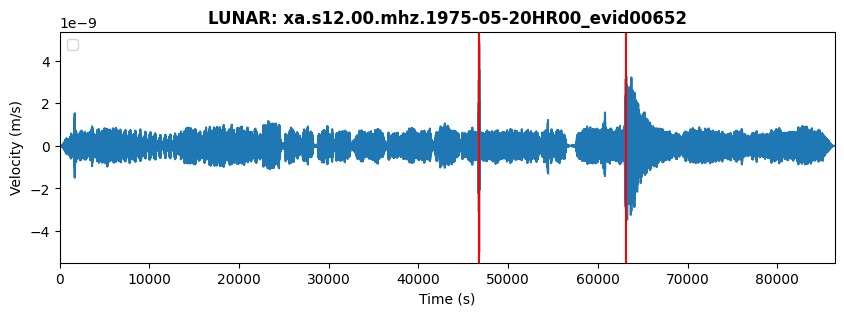

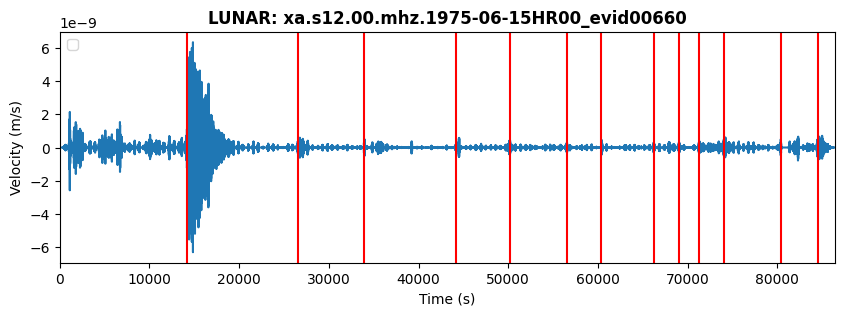

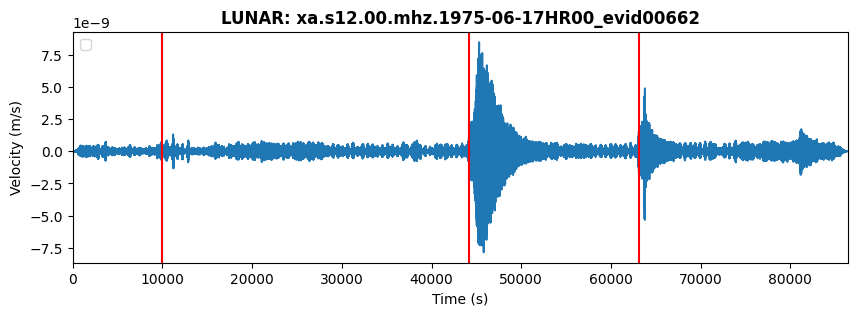

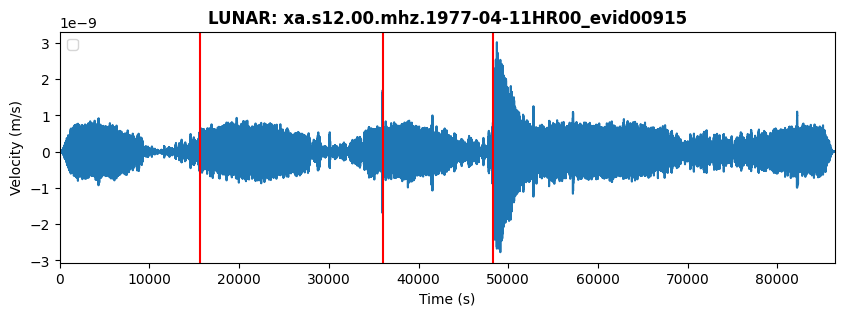

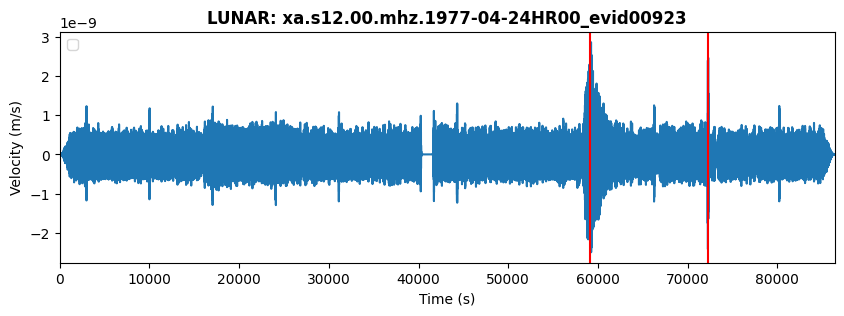

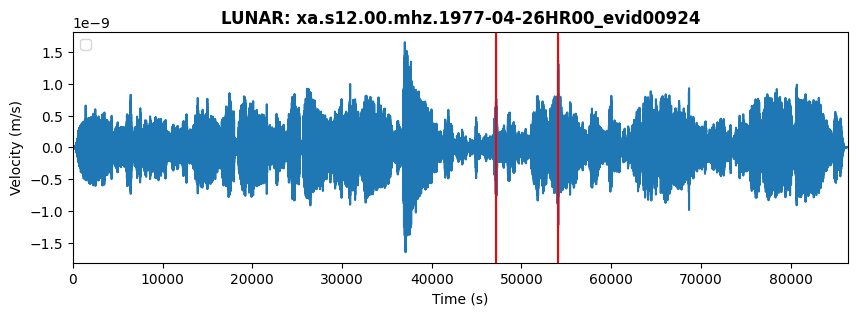

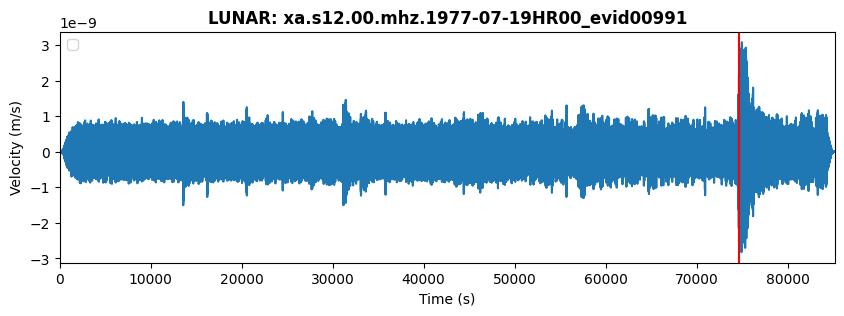

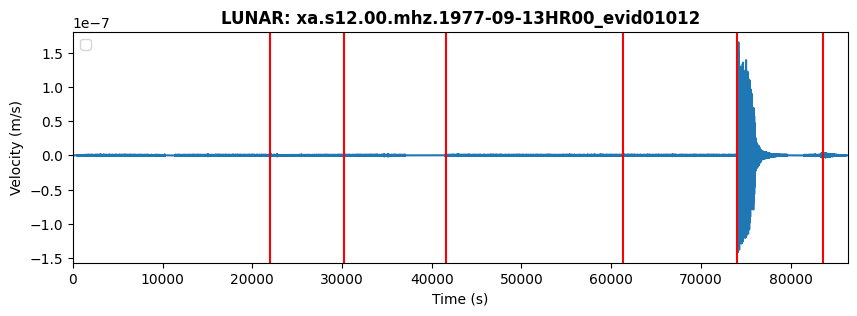

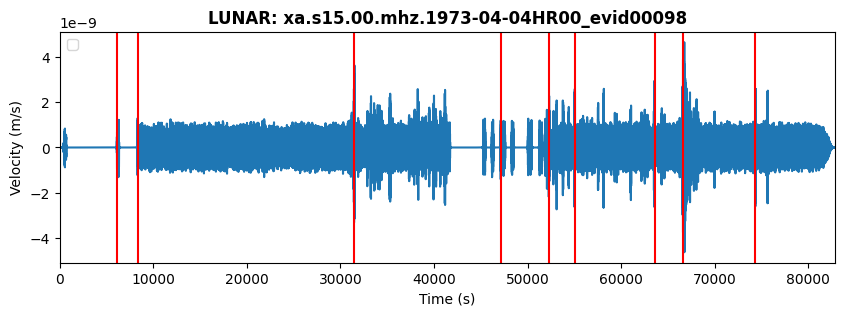

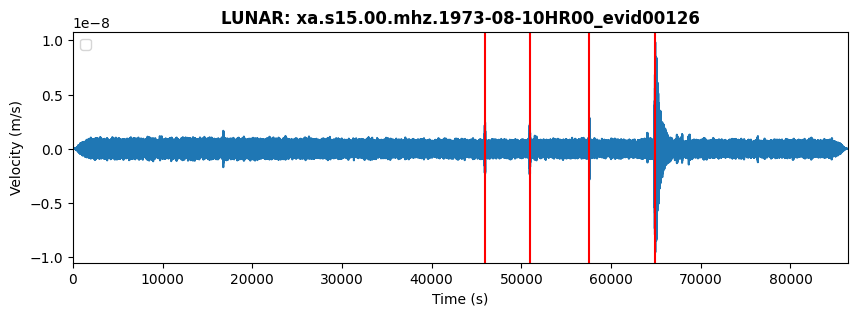

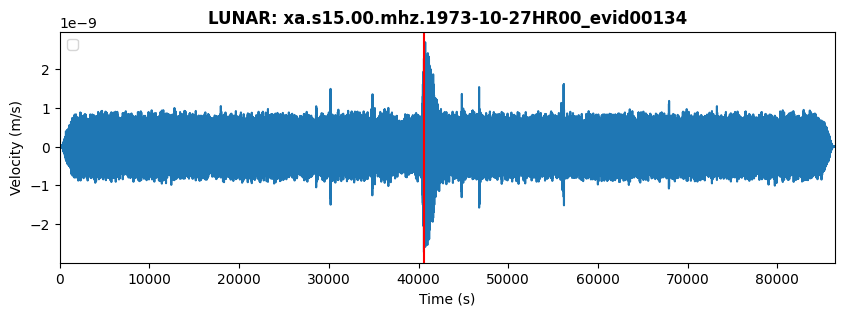

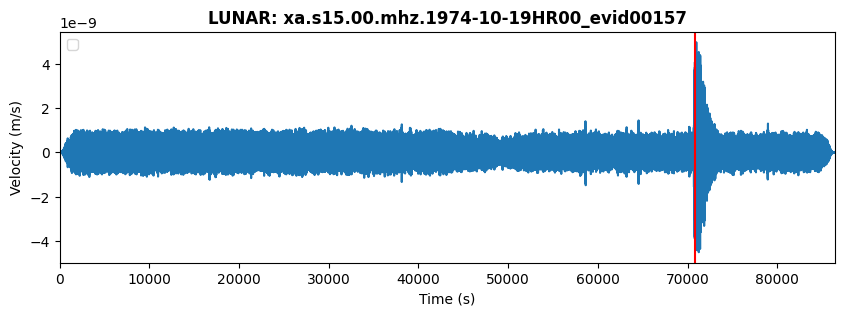

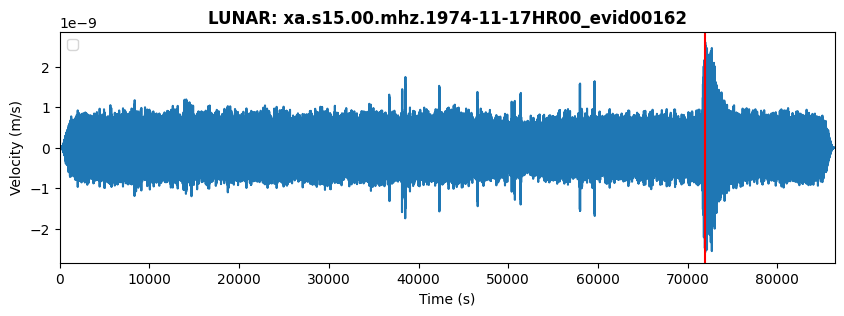

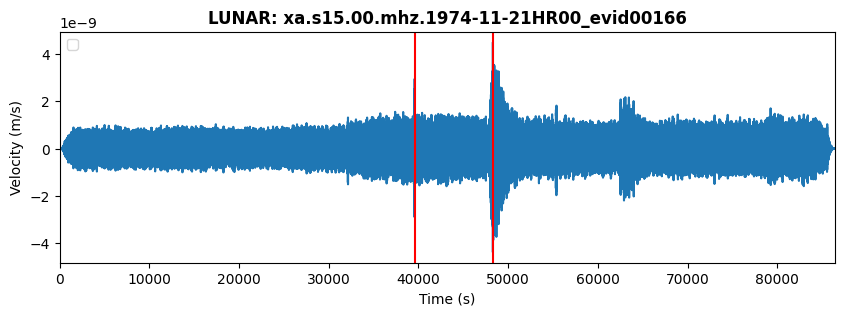

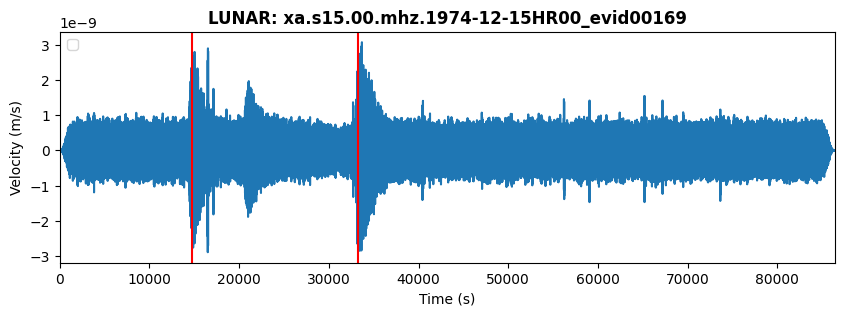

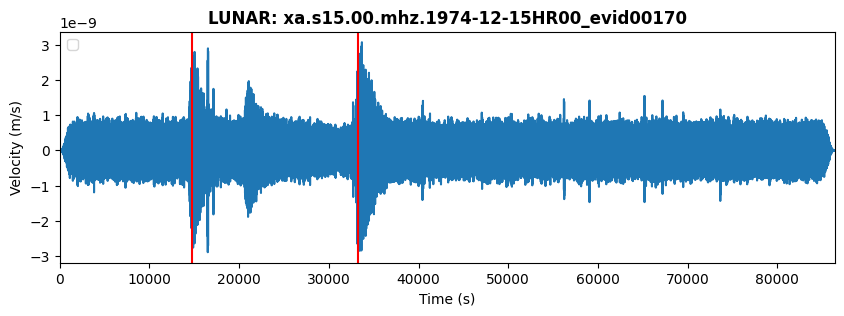

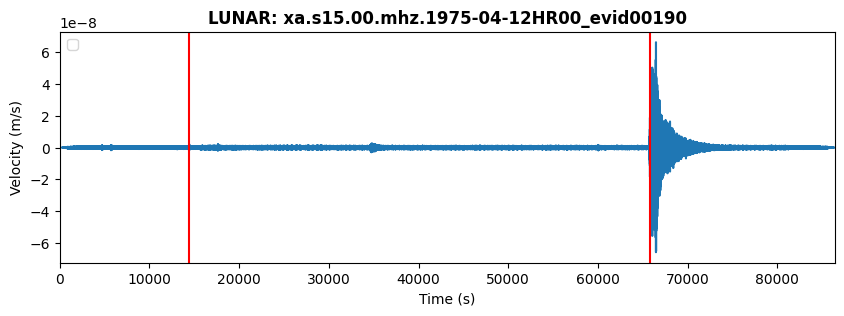

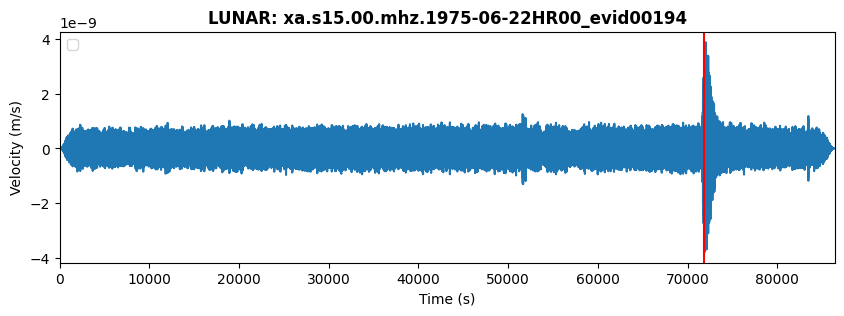

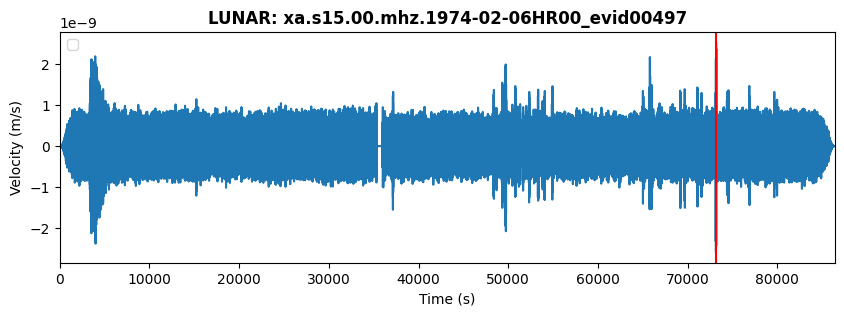

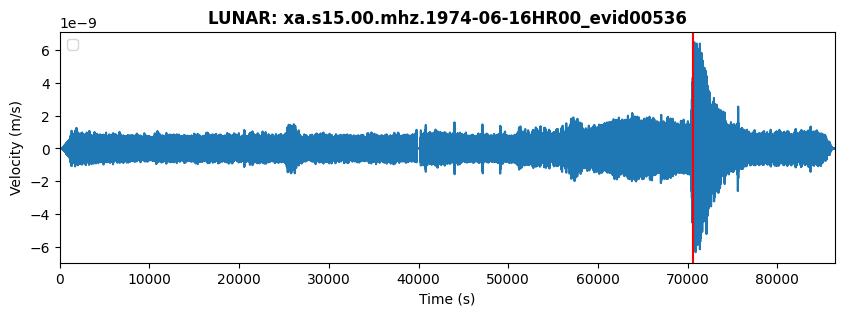

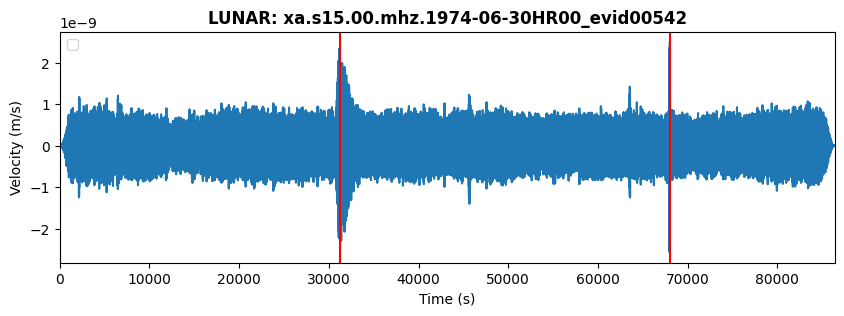

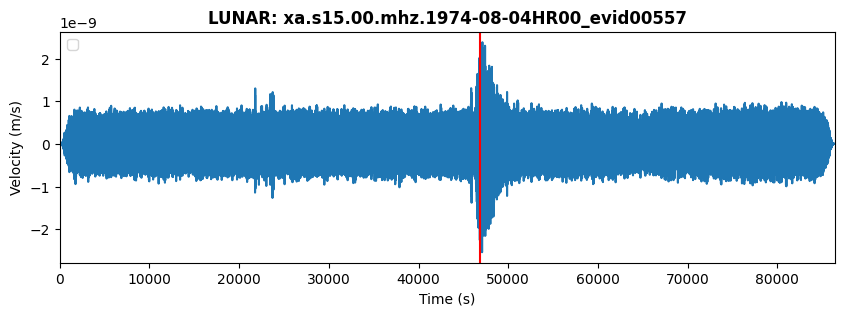

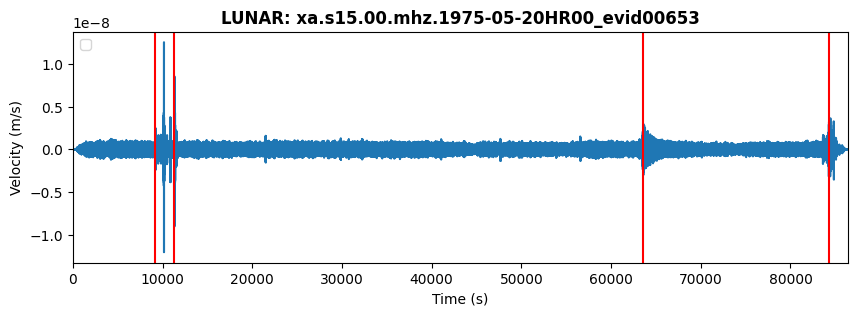

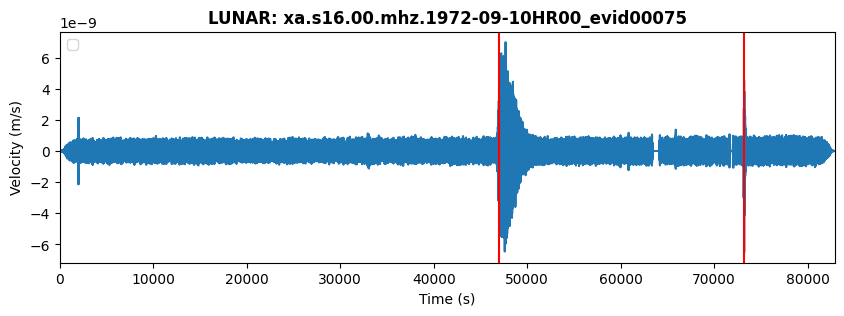

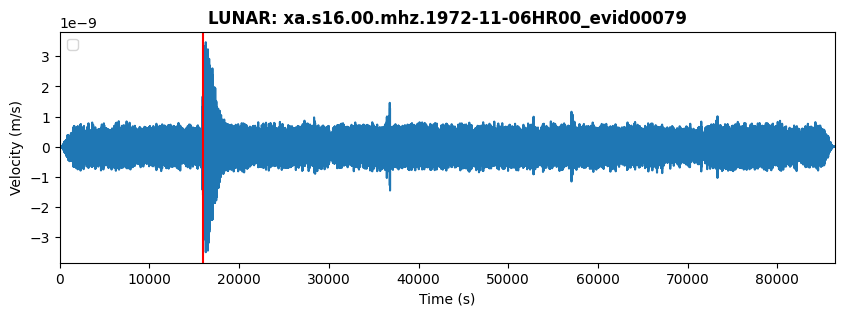

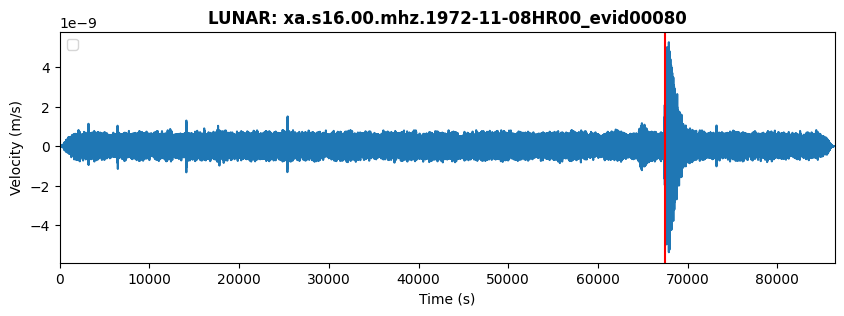

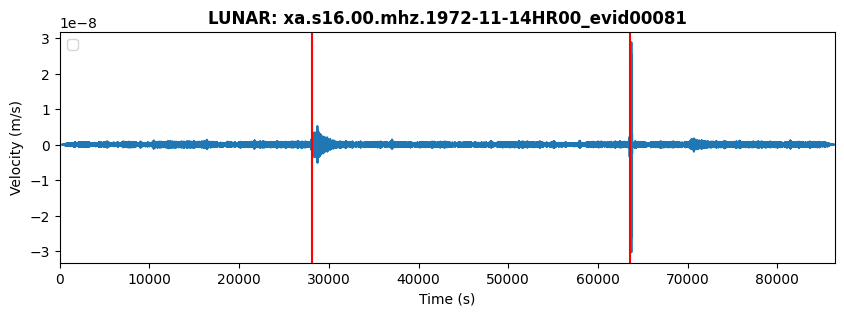

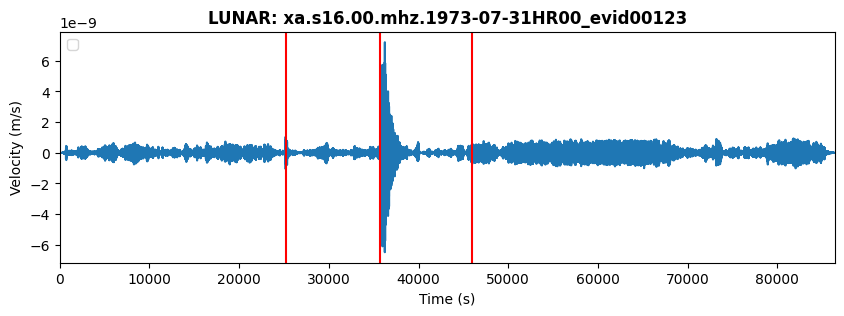

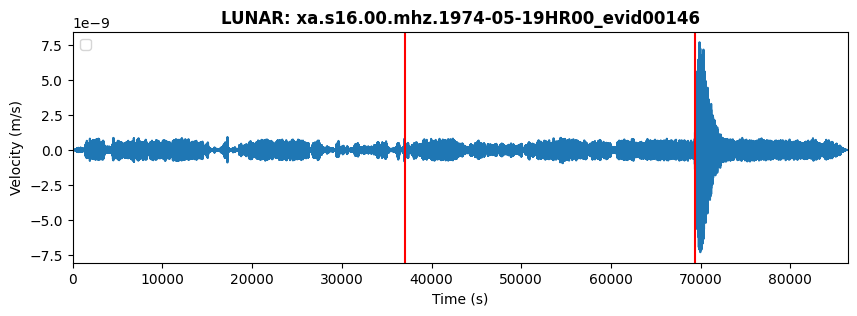

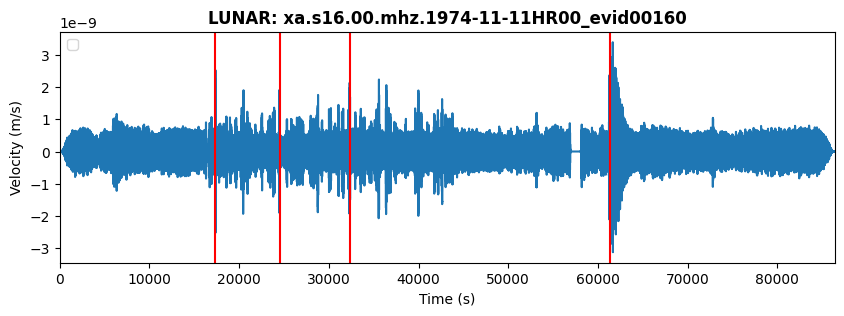

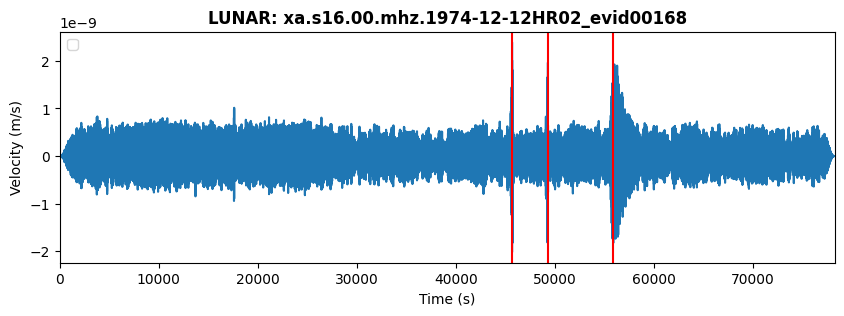

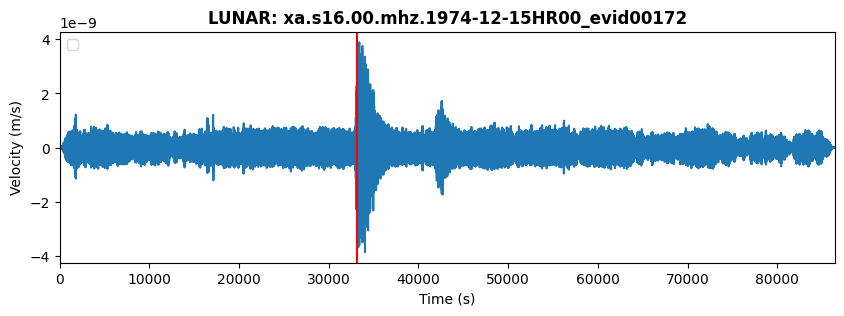

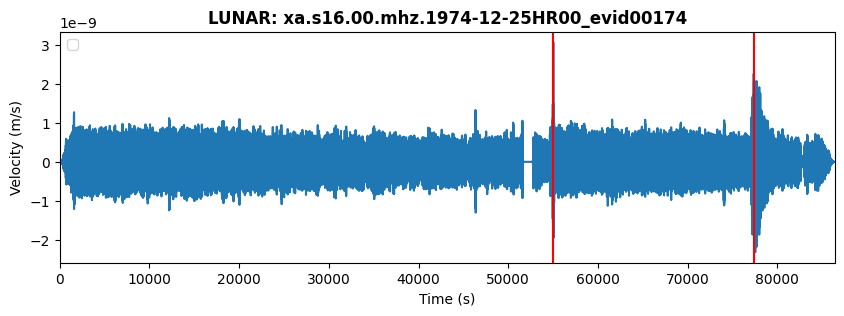

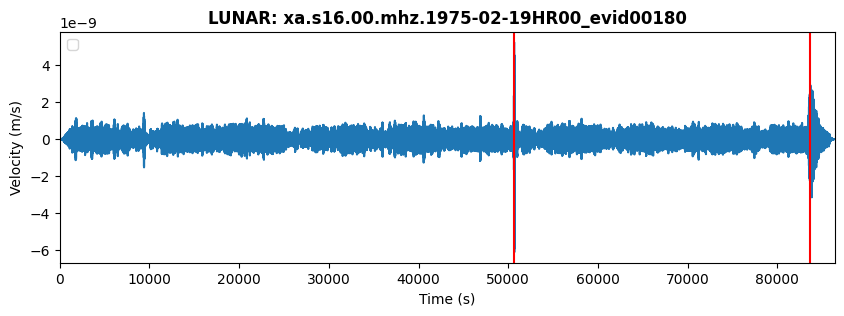

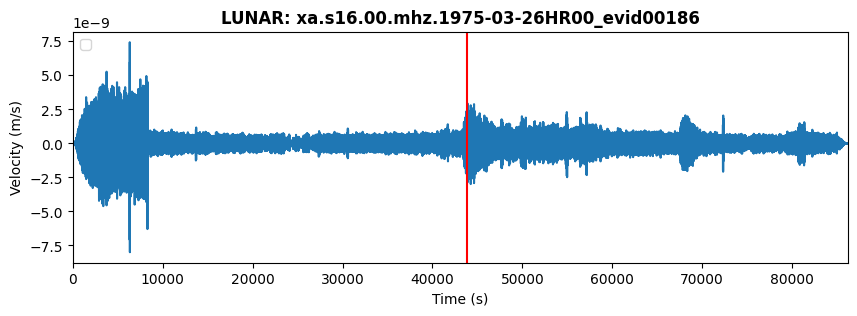

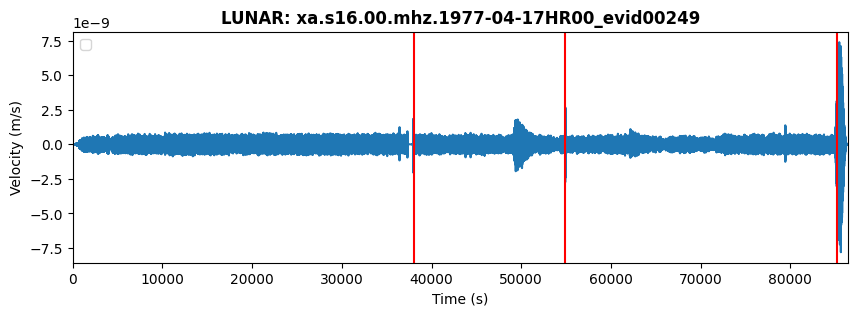

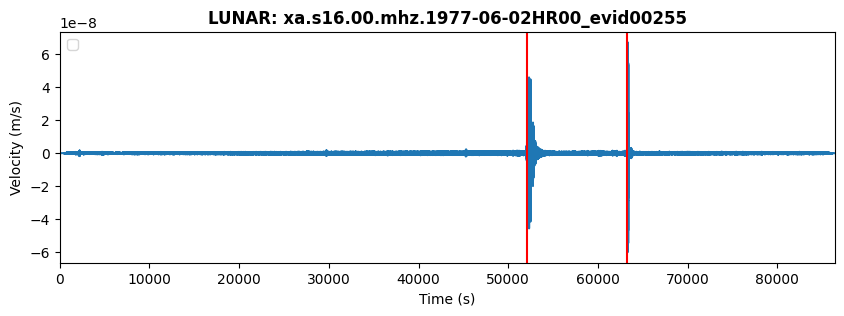

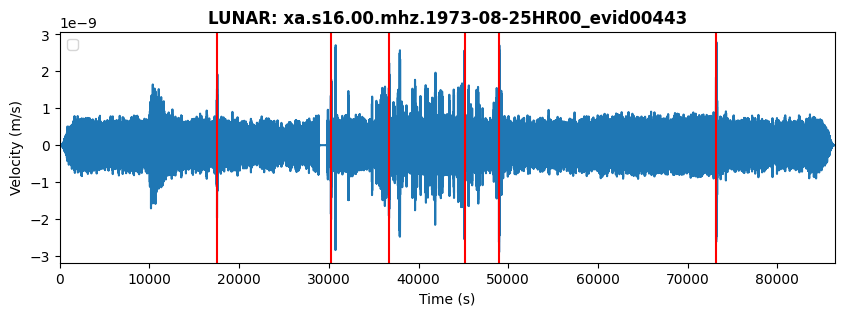

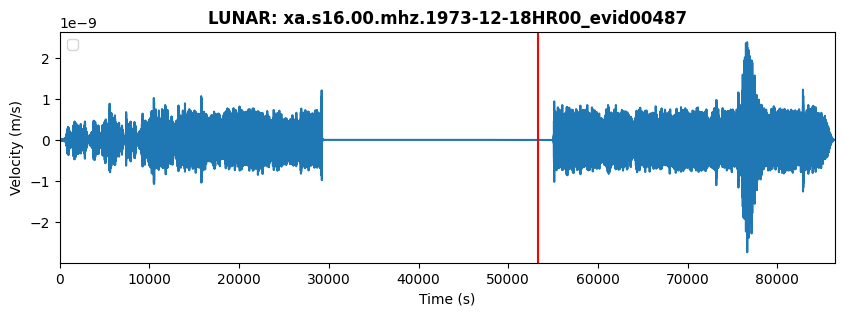

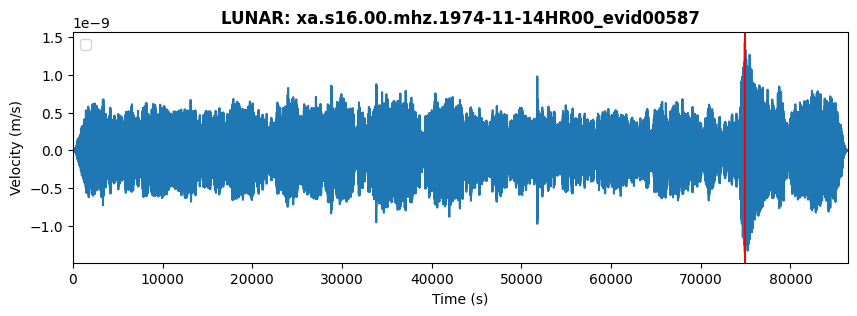

In [35]:
for filepath in mseed_files:
    mseed_file_names = os.path.splitext(os.path.basename(filepath))[0]
    preds = cat[cat['filename'] == mseed_file_names]
    arrival_times = preds['time_rel(sec)']
    
    st = read(filepath)
    
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data
    
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    
    ax.plot(tr_times,tr_data)
    
    for i in arrival_times:
        ax.axvline(x = i, color='red')
    ax.legend(loc='upper left')
    
    ax.set_xlim([min(tr_times),max(tr_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(f'LUNAR: {mseed_file_names}', fontweight='bold')
    fig.savefig('plots/catalog_lunar_predictions/'+mseed_file_names+'.png')

In [36]:
directory = r'E:\learning\space\data\mars\test'  
mseed_files = find_mseed_files(directory)

In [37]:
len(mseed_files)

9

In [38]:
cat_mars = pd.read_csv("E:\learning\space\catalog_mars_predictions.csv")
cat_mars

filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0   XB.ELYSE.02.BHV.2019-05-23HR02_evid0041     2019-05-23T02:09:59.982000   
1   XB.ELYSE.02.BHV.2019-05-23HR02_evid0041     2019-05-23T02:21:09.832000   
2   XB.ELYSE.02.BHV.2019-05-23HR02_evid0041     2019-05-23T02:38:08.832000   
3   XB.ELYSE.02.BHV.2019-07-26HR12_evid0033     2019-07-26T12:09:59.960000   
4   XB.ELYSE.02.BHV.2019-07-26HR12_evid0033     2019-07-26T12:22:50.910000   
5   XB.ELYSE.02.BHV.2019-07-26HR12_evid0033     2019-07-26T12:42:14.660000   
6   XB.ELYSE.02.BHV.2019-07-26HR12_evid0033     2019-07-26T12:54:08.510000   
7   XB.ELYSE.02.BHV.2019-07-26HR12_evid0034     2019-07-26T12:09:59.960000   
8   XB.ELYSE.02.BHV.2019-07-26HR12_evid0034     2019-07-26T12:22:50.910000   
9   XB.ELYSE.02.BHV.2019-07-26HR12_evid0034     2019-07-26T12:42:14.660000   
10  XB.ELYSE.02.BHV.2019-07-26HR12_evid0034     2019-07-26T12:54:08.510000   
11  XB.ELYSE.02.BHV.2019-09-21HR03_evid0032     2019-09-21T03:15:38.787000   
12  XB.ELYSE.02.BHV.2019-09-21HR03_evid0032     2019-09-21T03:30:36.737000   
13  XB.ELYSE.02.BHV.2019-09-21HR03_evid0032     2019-09-21T03:51:50.787000   
14  XB.ELYSE.02.BHV.2021-05-02HR01_evid0017     2021-05-02T01:10:08.925000   
15  XB.ELYSE.02.BHV.2021-05-02HR01_evid0017     2021-05-02T01:27:30.125000   
16  XB.ELYSE.02.BHV.2021-05-02HR01_evid0017     2021-05-02T01:47:15.525000   
17  XB.ELYSE.02.BHV.2021-10-11HR23_evid0011     2021-10-11T23:14:02.839000   
18  XB.ELYSE.02.BHV.2021-10-11HR23_evid0011     2021-10-11T23:28:40.139000   
19  XB.ELYSE.02.BHV.2021-10-11HR23_evid0011     2021-10-11T23:46:26.539000   
20  XB.ELYSE.02.BHV.2021-10-11HR23_evid0011     2021-10-11T23:56:27.739000   
21  XB.ELYSE.02.BHV.2021-12-24HR22_evid0007     2021-12-24T22:37:41.691000   
22  XB.ELYSE.02.BHV.2022-04-09HR22_evid0002     2022-04-09T22:37:44.935000   
23  XB.ELYSE.02.BHV.2022-04-09HR22_evid0002     2022-04-09T22:52:57.135000   
24  XB.ELYSE.02.BHV.2022-05-04HR23_evid0001     2022-05-04T23:27:47.848000   

    time_rel(sec)  
0          599.95  
1         1269.80  
2         2288.80  
3          599.95  
4         1370.90  
5         2534.65  
6         3248.50  
7          599.95  
8         1370.90  
9         2534.65  
10        3248.50  
11         938.75  
12        1836.70  
13        3110.75  
14         608.90  
15        1650.10  
16        2835.50  
17         842.80  
18        1720.10  
19        2786.50  
20        3387.70  
21        2261.65  
22        2264.90  
23        3177.10  
24        1667.80

C:\Users\AHSYV4O\AppData\Local\Temp\ipykernel_20844\2855773672.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


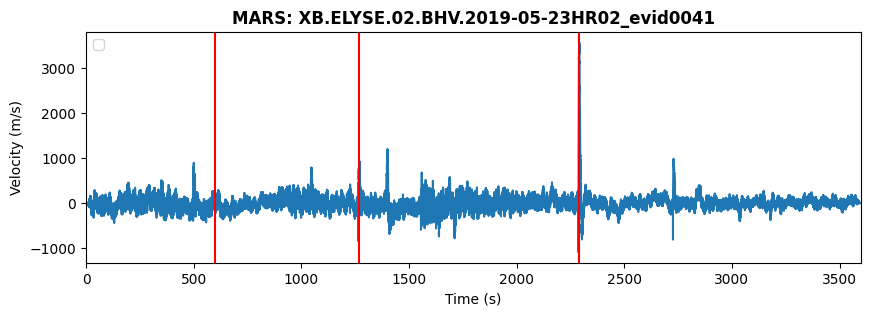

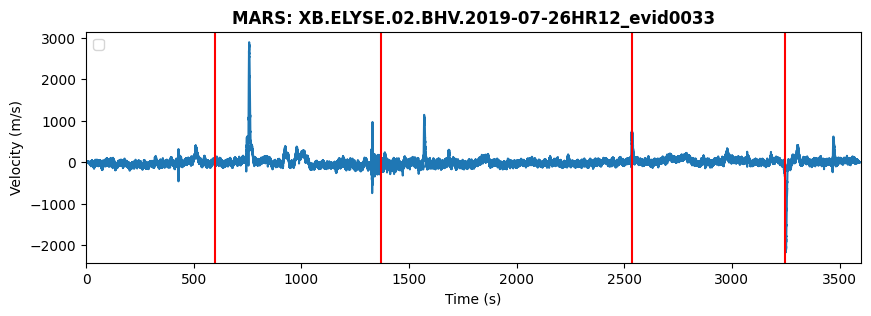

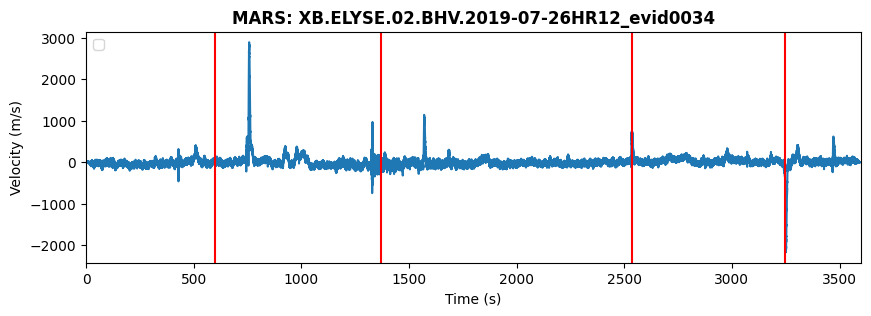

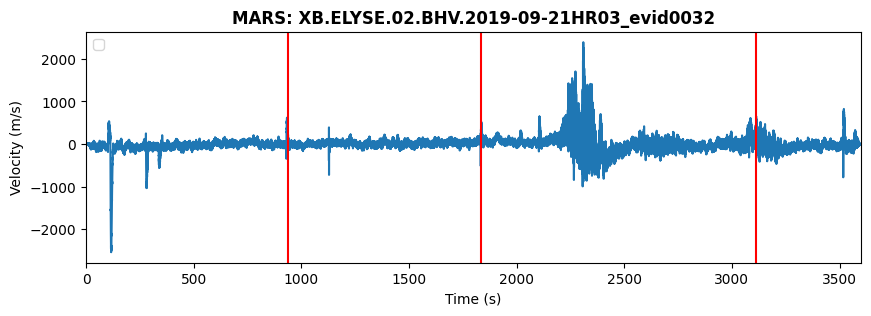

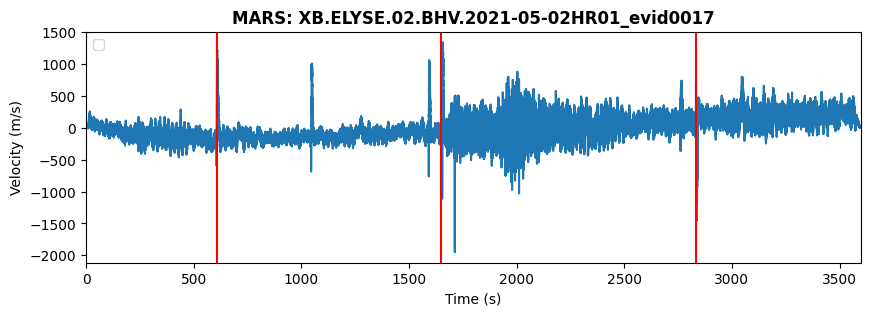

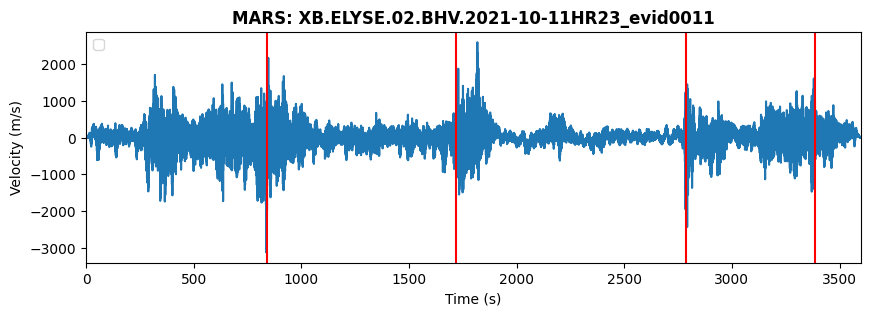

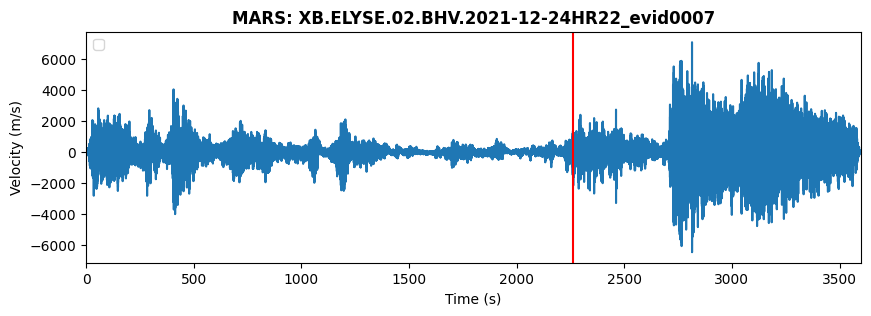

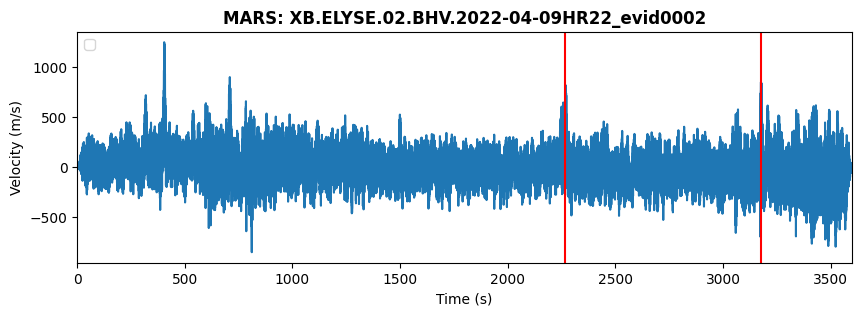

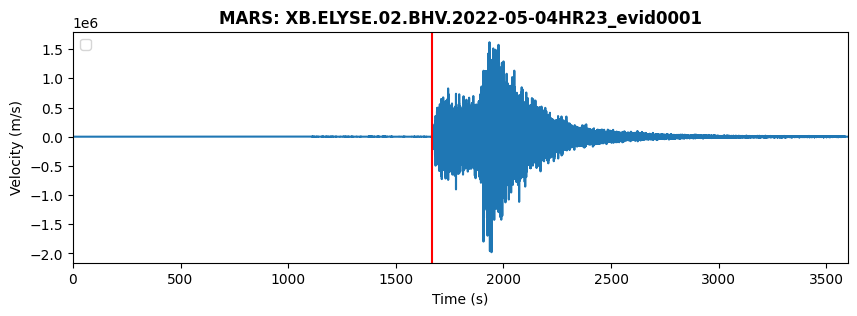

In [39]:
for filepath in mseed_files:
    mseed_file_names = os.path.splitext(os.path.basename(filepath))[0]
    preds = cat_mars[cat_mars['filename'] == mseed_file_names]
    arrival_times = preds['time_rel(sec)']
    
    st = read(filepath)
    
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data
    
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    
    ax.plot(tr_times,tr_data)
    
    for i in arrival_times:
        ax.axvline(x = i, color='red')
    ax.legend(loc='upper left')
    
    ax.set_xlim([min(tr_times),max(tr_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(f'MARS: {mseed_file_names}', fontweight='bold')
    fig.savefig('plots/catalog_mars_predictions/'+mseed_file_names+'.png')
    
    
